<div style=" background-color:	#adbcc1; color:white; padding: 10px; width:90%; margin:auto; text-align: center;">
    <strong><h1>To grant or not to grant: Deciding on compensation benefits</h1></strong>
    <h3>Machine Learning 2024/2025</h3>
</div>

Group members:
Filipa
Klimentina
Maria
Rita
Rita
Sven


**<h2> Table of Contents </h2>**
* [1. Data Exploration](#dataexploration)
    * [1.1 Importing Libraries and Dataset](#imports)
    * [1.2 Load the dataset](#load)
    * [1.3 Initial analysis of the dataset structure](#initial)
    * [1.4 Missing values](#missing)
    * [1.4 Duplicate values](#duplicate)


<h2 id="dataexploration"> 1. Data Exploration</h2>

<h3 id='imports'>1.1 Importing Libraries and Dataset</h3>

In [63]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import missingno as msno



<h3>1.2 Load the dataset</h3>

In [64]:
# Read the csv file
#We've added low_memory=False since the Zip Code column has mixed data types (numbers and strings)
wcb = pd.read_csv('train_data.csv', delimiter=',', low_memory=False)

<h3>1.3 Initial analysis of the dataset</h3>

In [65]:
wcb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [66]:
wcb.shape

(593471, 33)

There are 593471 rows and 33 columns.

In [67]:
wcb.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


<strong>Target variable</strong>: <code>Claim Injury Type</code> <br>
It refers to the WCB decision regarding the benefits awarded to the claim.

<h3>1.4 Missing values</h3>

Let's start by checking which columns have missing values:

In [68]:
#Total number of missing values
total_missing = wcb.isnull().count()
#Number of missing values in each column
missing_count = wcb.isnull().sum()
#% of missing values for each column
missing_percentage=((missing_count/total_missing)*100).round(2)

missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percentage
})
missing_data = missing_data.sort_values(by='Missing Count',ascending=False)
missing_data

,Missing Count,Missing %
OIICS Nature of Injury Description,593471,100.00
IME-4 Count,460668,77.62
First Hearing Date,442673,74.59
C-3 Date,406226,68.45
Birth Year,48523,8.18
Average Weekly Wage,48096,8.10
Zip Code,48082,8.10
WCIO Part Of Body Code,36527,6.15
WCIO Part Of Body Description,36527,6.15
WCIO Nature of Injury Code,35102,5.91


<Axes: >

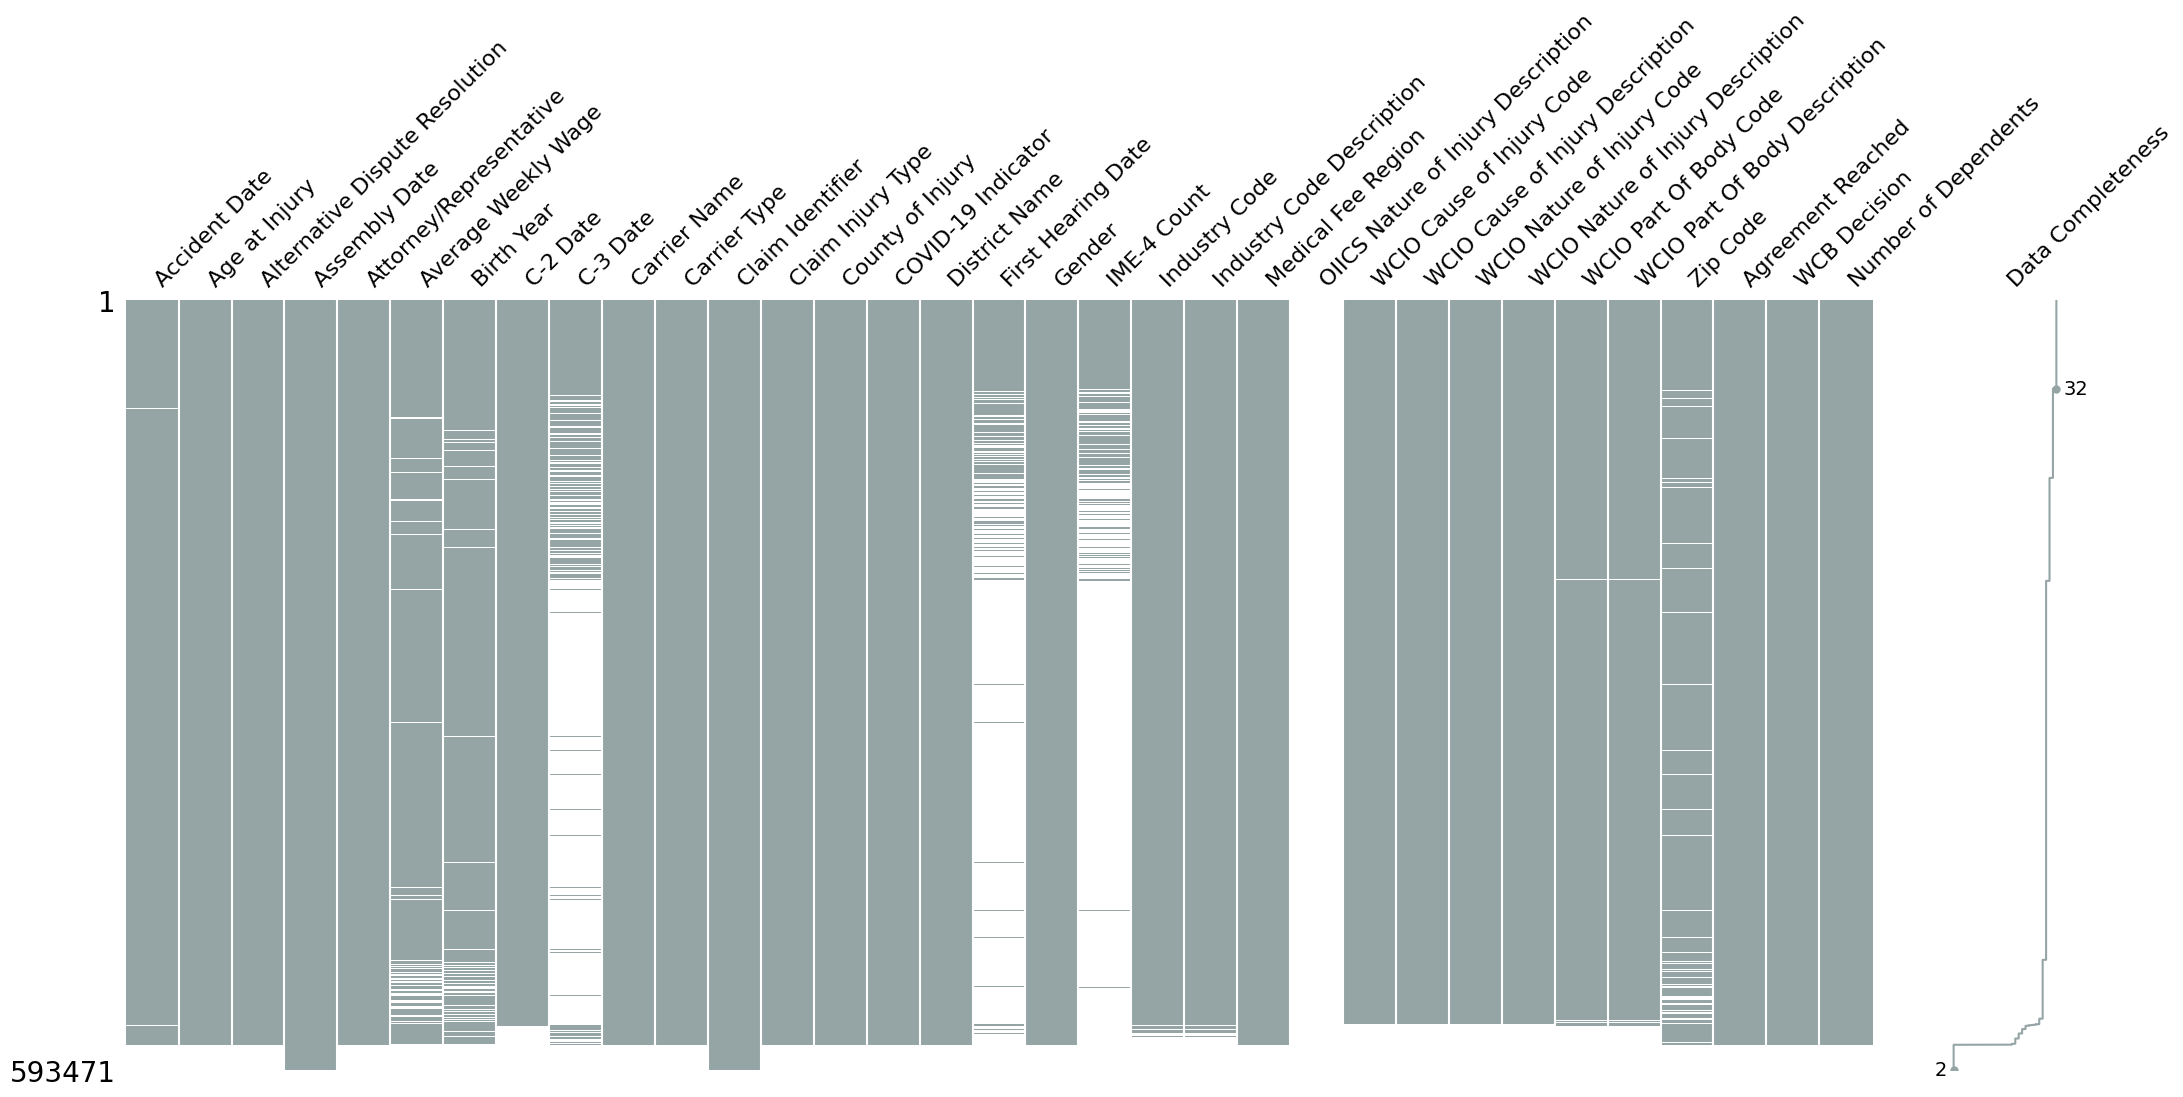

In [69]:
msno.matrix(wcb, labels=True, sort="descending", color=(149/255, 165/255, 166/255))

The column <code>OIICS Nature of Injury Description</code> is completly null, so we will drop this column.

In [70]:
wcb.drop(columns=['OIICS Nature of Injury Description'], inplace=True) #Dropping OIICS Nature of Injury Description

Note that WCB Decision only has one value: 'Not Work Related'. So we'll drop this one too as it is not useful since we don't have the values.

In [71]:
print(f'WCB Decision unique values: {wcb['WCB Decision'].unique()}')

WCB Decision unique values: ['Not Work Related' nan]


In [72]:
wcb.drop(columns=['WCB Decision'], inplace=True) #Dropping WCB Decision column

Visually we can see that there are a lot of rows with missing values. Setting a threshold of 90%, let's check how many rows are missing 90% or more of the data.

In [73]:
# Obtaining a threshold for the number oof missing values in a row
threshold_missing_data = 0.9 * wcb.shape[1]  # 90% of the number of columns

# Count the number of rows that have 90% or more of the values missing
num_rows_with_90_null = (wcb.isnull().sum(axis=1) >= threshold_missing_data).sum()

print(f"Number of rows with 90% or more null values: {num_rows_with_90_null}")


Number of rows with 90% or more null values: 19445


Given that there is a considerable amount of rows with 90% or more missing values, we will drop those.

In [74]:
wcb = wcb[wcb.isnull().sum(axis=1) < threshold_missing_data]
wcb.shape

(574026, 31)

In [75]:
#Total number of missing values
total_missing = wcb.isnull().count()
#Number of missing values in each column
missing_count = wcb.isnull().sum()
#% of missing values for each column

missing_percentage=((missing_count/total_missing)*100).round(2)
missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percentage
})
missing_data = missing_data.sort_values(by='Missing Count',ascending=False)
missing_data

,Missing Count,Missing %
IME-4 Count,441223,76.86
First Hearing Date,423228,73.73
C-3 Date,386781,67.38
Birth Year,29078,5.07
Average Weekly Wage,28651,4.99
Zip Code,28637,4.99
WCIO Part Of Body Code,17082,2.98
WCIO Part Of Body Description,17082,2.98
WCIO Nature of Injury Code,15657,2.73
WCIO Nature of Injury Description,15657,2.73


Still, we're left with missing values that we have to evaluate one by one.

<h5>1.4.1 IME-4 Count</h5>

In [76]:
wcb['IME-4 Count'].unique()

array([nan,  4.,  1.,  3.,  2.,  6.,  7.,  5., 10., 12.,  8.,  9., 11.,
       13., 14., 36., 15., 20., 19., 18., 27., 17., 16., 24., 22., 26.,
       21., 23., 30., 32., 39., 25., 29., 47., 48., 34., 28., 37., 31.,
       35., 33., 73.])

> Given that the IME-4 Count refers to the number of "Independent Examiner's Report of Independent Medical Examination" forms received, we consider that it makes sense that the missing values actually refer to none, as we can see from the unique values, there are no zeros. So we'll convert the missing values to zero.

In [77]:
# wcb['IME-4 Count'].fillna(0, inplace=True)

<h5>1.4.2 First Hearing Date</h5>

> As stated in the project description, a blank date simply means that the hearing hasn't happened yet. We should look into filling these blank spaces with a placeholder NaT (after converting to datetime). Apart from it, we should consider creating a boolean column with the dates. If there was a hearing date then it's True, else it's False.

In [78]:
# wcb['First Hearing Held'] = wcb['First Hearing Date'].notnull()

<h5>1.4.3 C-2 Date and C-3 Date</h5>

> C-3 Date refers to the date that the Employee Claim Form was received, given the large percentage of missing values (67%), we've decided to assume that the blank values mean that there was no form received.

>C-2 Date if there are missing values we'll assume that it was not received.

> Given that we'll treat these columns the same way we'll treat the First Hearing Date, noting that we should check to see if it's worth keeping the actual dates.



In [79]:
# wcb['C-3 Form Received'] = wcb['First Hearing Date'].notnull()

<h5>1.4.4 Birth Year</h5>

> Note that there are no <code>Age at Injury</code> values missing and only 3689 <code>Accident Date</code> values missing, compared to the 29078 <code>Birth Year</code>. Given that, we could calculate the null birth years by calculating the difference between age at injury and accident date to eliminate most of the missing values.

> Note that there are a 5464 ages that are zero.

> The rest that isn't filled with this method, we'll just put unknown.

In [80]:
print((wcb['Age at Injury'] == 0).sum())

5464


In [81]:
# wcb.loc[wcb['Birth Year'].isna(), 'Birth Year'] = (
#     wcb['Accident Date'].dt.year - wcb['Age at Injury'])

#Note that if we were to do this, we're left with 176 Birth Years missing.

<h5>1.4.5 Average Weekly Wage</h5>

In [83]:
wcb['Average Weekly Wage'].describe()

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

In [91]:
(wcb['Average Weekly Wage'] == 0).sum()

np.int64(335450)

In [ ]:
wcb.shape[0]

545375

In [95]:
(wcb['Average Weekly Wage']).count()

np.int64(545375)

> Apart from the missing values, there are a lot of zeros in Average Weekly Wage, and as we can see the median is zero and the mean is influenced by outliers, we could consider imputing with the median of the non-zero values.

> Or predictive imputing, maybe based on the Industry Code.

In [ ]:
# # Calculate the median of non-zero values
# non_zero_median = wcb[wcb['Average Weekly Wage'] > 0]['Average Weekly Wage'].median()

# # Replace NaN values with the calculated median of non-zero values
# wcb.loc[wcb['Average Weekly Wage'].isna(), 'Average Weekly Wage'] = non_zero_median


<h5>1.4.6 Zip Code</h5>

> We'll check for patterns and see if it's important for our analysis. If not we think that we can drop this column.

> Could consider filling with a placeholder 'UNKNOWN'.

<h5>1.4.7 WCIO BODY etc....  </h5>

<h5>1.4.8 Industry Code and Industry Code Description</h5>

> There are 9958 missing values, we'll assume that the blank values mean that it was not reported, so we'll fill it with UNKNOWN. But we should also check for if the the rows that have Industry Code missing are also missing the Industry Code Description.

In [108]:
missing_industry_codes = wcb[wcb['Industry Code'].isna()]
missing_description_count = missing_industry_codes['Industry Code Description'].isna().sum()
missing_description_count

np.int64(9473)

> As we can see, there are claims where the Industry Code is missing, but the description isn't. We could use that to fill the missing Industry codes and vice versa.

<h3 id="duplicate">1.5 Duplicate rows</h3>

In [ ]:
wcb['Claim Identifier'].nunique()

SyntaxError: invalid syntax (3765389127.py, line 1)

Given that the number of Claim Identifier is unique to each claim, we've decided to set it as index.

In [ ]:
wcb.set_index('Claim Identifier',inplace=True) 

In [ ]:
wcb.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,6.0
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,1.0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,5.0


In [ ]:
duplicates = wcb.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1


In [ ]:
duplicate_rows = wcb[wcb.duplicated(keep=False)]  # Keep=False will show all instances of the duplicates
duplicate_rows

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5686981,NaN,0.0,N,2021-03-25,Y,0.0,1968.0,NaN,2021-03-16,ACE AMERICAN INSURANCE CO,...,UK,NaN,NaN,NaN,NaN,NaN,NaN,07032,0.0,0.0
5686771,NaN,0.0,N,2021-03-25,Y,0.0,1968.0,NaN,2021-03-16,ACE AMERICAN INSURANCE CO,...,UK,NaN,NaN,NaN,NaN,NaN,NaN,07032,0.0,0.0


We will drop one of the duplicates.

In [ ]:
wcb.drop_duplicates(inplace=True)
duplicates = wcb.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


<h3>1.6 Data Type</h3>

In [ ]:
wcb.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,570337,5539,2020-03-01,1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,574025.0,NaN,NaN,NaN,42.114343,14.256336,0.0,31.0,42.0,54.0,117.0
Alternative Dispute Resolution,574025,3,N,571411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,574025,897,2020-03-06,1413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,574025,2,N,392291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,545374.0,NaN,NaN,NaN,491.089221,6092.92367,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544947.0,NaN,NaN,NaN,1886.767454,414.644789,0.0,1965.0,1977.0,1989.0,2018.0
C-2 Date,559466,2475,2021-05-11,1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,187244,1648,2021-04-21,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,574025,2046,STATE INSURANCE FUND,111144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
wcb.dtypes

Accident Date                         object
Age at Injury                        float64
Alternative Dispute Resolution        object
Assembly Date                         object
Attorney/Representative               object
Average Weekly Wage                  float64
Birth Year                           float64
C-2 Date                              object
C-3 Date                              object
Carrier Name                          object
Carrier Type                          object
Claim Injury Type                     object
County of Injury                      object
COVID-19 Indicator                    object
District Name                         object
First Hearing Date                    object
Gender                                object
IME-4 Count                          float64
Industry Code                        float64
Industry Code Description             object
Medical Fee Region                    object
WCIO Cause of Injury Code            float64
WCIO Cause

In [ ]:
wcb['Alternative Dispute Resolution'].unique()

array(['N', 'Y', 'U'], dtype=object)

<h5>1.6.1 Object </h5>

The following variables are objects and we have decided to keep them that way:
1. <code>Carrier Name</code>: categorical? We will be looking to drop this variable later, since we're thinking of using Carrier Type
2. <code>Industry Code Description</code>
3. <code>WCIO Cause of Injury Description</code>
4. <code>WCIO Nature of Injury Description</code>
5. <code>WCIO Part Of Body Description</code>
6. <code>Zip Code</code>

<h5>1.6.2 Datetime </h5>

The following variables are  objects, but we'll change them to datetime, and the missing values NaN will turn into NaT:
1. <code>Accident  Date</code>
2. <code>Assembly Date</code>
3. <code>C-2 Date</code>
4. <code>C-3 Date</code>
5. <code>First Hearing Date</code>

In [ ]:
dates = ['Accident Date','Assembly Date','C-2 Date','C-3 Date','First Hearing Date']
for date in dates:
    wcb[date] = pd.to_datetime(wcb[date], errors='coerce')

<h5>1.6.3 Categorical</h5>

We will change these variables to categorical and when applicable we'll remove the numbers from the identifier.
1. <code>Carrier Type</code>: apart from changing to categorical, we'll be grouping '5D. SPECIAL FUND - UNKNOWN', '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)' and '5C. SPECIAL FUND - POI CARRIER WCB MENANDS' as 'SPECIAL FUND'. As well as changing the name of the other types to just 'PRIVATE', 'SIF', 'SELF PUBLIC' and 'SELF PUBLIC'.

2. <code>Claim Injury Type</code>: Removing the numbers and we'll have the categories 'CANCELLED', 'NON-COMP', 'MED ONLY', 'TEMPORARY', 'PPD SCH LOSS', 'PPD NSL«, 'PTD, 'DEATH'.

3. <code>County of Injury</code>: There are 63 counties, and we'll convert it to categorical as well.

4. <code>District Name</code>: 8 categories 

5. <code>Gender</code>: There are 4 unique values 'M', 'F', 'U', 'X', as we don't know the meaning of 'X' and there are only 46 records, we will be grouping it with 'U' (UNKNOWN).

6. <code>Industry Code</code>: Has 9957 missing values, so we'll only convert it to categorical after taking care of the missing values.

7. <code>Medical Fee Region</code>: convert to numbers 1,2,3,4,5.

8. <code>WCIO Cause of Injury Code</code>, <code>WCIO Nature of Injury Code</code>, <code>WCIO Part Of Body Code</code>: All have missing values, so we'll only convert it to categorical after imputing the missing values. Apart from that we'll create a dictionary with these codes and the associated description. <strong>Should look into merging some categories too!</strong>

In [ ]:
#Changing Carrier Type and grouping the special funds.
#Start by creating a dictionary that will map the names
carrier_type_map = {
    '1A. PRIVATE': 'PRIVATE',
    '2A. SIF': 'SIF',
    '3A. SELF PUBLIC': 'SELF PUBLIC',
    '4A. SELF PRIVATE': 'SELF PRIVATE',  
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 'SPECIAL FUND',
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 'SPECIAL FUND',
    '5D. SPECIAL FUND - UNKNOWN': 'SPECIAL FUND' #Group all 3 special funds
}

#Now let's replace the values of the Carrier Type Values with the new ones
wcb['Carrier Type'] = wcb['Carrier Type'].replace(carrier_type_map)

#Convert type to categorical
wcb['Carrier Type'] = wcb['Carrier Type'].astype('category')

In [ ]:
#Let's do the same for Claim Injury Type
claim_injury_map = {
    '1. CANCELLED':'CANCELLED',
    '2. NON-COMP':'NON-COMP',
    '3. MED ONLY':'MED ONLY',
    '4. TEMPORARY':'TEMPORARY',
    '5. PPD SCH LOSS':'PPD SCH LOSS',
    '6. PPD NSL':'PPD NSL',
    '7. PTD':'PTD',
    '8. DEATH':'DEATH'
}

wcb['Claim Injury Type'] = wcb['Claim Injury Type'].replace(claim_injury_map)

wcb['Claim Injury Type'] = wcb['Claim Injury Type'].astype('category')

In [ ]:
gender_map = {'X':'U'} 
wcb['Gender']=wcb['Gender'].replace(gender_map)
wcb['Gender']=wcb['Gender'].astype('category')

In [ ]:
medical_fee_map = {
    'I':1,
    'II':2,
    'III':3,
    'IV':4,
    'UK':'UNKNOWN'
}

wcb['Medical Fee Region']=wcb['Medical Fee Region'].replace(medical_fee_map)
wcb['Medical Fee Region']=wcb['Medical Fee Region'].astype('category')

In [ ]:
wcb['County of Injury'] = wcb['County of Injury'].astype('category')
wcb['District Name'] = wcb['District Name'].astype('category')

In [ ]:
#Industry Code, WCIO Cause of Injury Code, WCIO Nature of Injury Code and WCIO Part Of Body Code
#We'll change after missing values are gone

<h5>1.6.4 Integer</h5>

1. <code>Age at Injury</code>: Age has no missing values, so we should just convert it to int right away.

2. <code>Birth Year</code>: It's got missing values, so we'll take care of those later on and then convert it to int.

3. <code>IME-4 Count</code>: Should also be int, but it's got 441222 missing values. We'll impute and discuss the missing values later on.

4. <code>Number of Dependents</code>: Has no missing values, so we can turn it into int type now.

In [ ]:
wcb['Age at Injury'] = wcb['Age at Injury'].astype('int')
wcb['Number of Dependents'] = wcb['Number of Dependents'].astype('int')

In [ ]:
#Birth Year and IME-4 Count have missing values that need to be taken care of

<h5>1.6.5 Float</h5>

1. Avergae Weekly Wage: it's a float and should maintain as a float, as it is an average of the weekly wage.

<h5>1.6.6 Boolean</h5>

1. <code>Alternative Dispute Resolution</code>: it's an object but should be treated as boolean, as in if there was or wasn't an Alternative Dispute Resolution. Note that there are 5 entries where the value is 'U', we'll replace those with None and decide on what to do later.

2. <code>Attorney/Representative</code>: 'Y' and 'N', change to boolean.

3. <code>COVID-19 Indicator</code>: values 'Y' and 'N', so we'll change to boolean as well.

4. <code>Agreement Reached</code>: Values 0 and 1, with dtype as float. Change to boolean.


In [ ]:
wcb[wcb['First Hearing Date'].isna()].shape

(423228, 30)

In [ ]:

wcb['Alternative Dispute Resolution'] = wcb['Alternative Dispute Resolution'].replace('U', None)

change_to_bool = ['Alternative Dispute Resolution','Attorney/Representative','COVID-19 Indicator', 'Agreement Reached']
for column in change_to_bool:
    wcb[column]=wcb[column].map({'Y': True, 'N': False, 0:False, 1:True})
    wcb[column]=wcb[column].astype('bool')

#Turn them all to bool, note that null values will turn to False. 
#But only Alternative Dispute Resolution has null values, and it's 5.

In [ ]:
wcb.dtypes

Accident Date                        datetime64[ns]
Age at Injury                                 int64
Alternative Dispute Resolution                 bool
Assembly Date                        datetime64[ns]
Attorney/Representative                        bool
Average Weekly Wage                         float64
Birth Year                                  float64
C-2 Date                             datetime64[ns]
C-3 Date                             datetime64[ns]
Carrier Name                                 object
Carrier Type                               category
Claim Injury Type                          category
County of Injury                           category
COVID-19 Indicator                             bool
District Name                              category
First Hearing Date                   datetime64[ns]
Gender                                     category
IME-4 Count                                 float64
Industry Code                               float64
Industry Cod

<h4>Numerical and Categorical variables</h4>

| Numerical             |Categorical                      |
|-----------            |-----------                      |
|Accident Date          |Alternative Dispute Resolution   | 
|Age at Injury          |Carrier Name                     | 
|Assembly Date          |Carrier Type                     | 
|Average Weekly Wage    |Claim Injury Type                |
|Birth Year             |County of Injury                 |
|C-2 Date               |COVID-19 Indicator               |
|C-3 Date               |District Name                    |
|IME-4 Count            |First Hearing Date               |
|Number of Dependents   |Gender                           |
|                       |Industry Code                    |
|                       |Medical Fee Region               |
|                       |WCIO Cause of Injury Code        |
|                       |WCIO Nature of Injury Code       |
|                       |WCIO Part Of Body Code           |
|                       |Zip Code                         |
|                       |Agreement Reached                |

WCIO descriptions are not included because they will be dropped afterwards.

In [ ]:
numerical = ['Accident Date','Age at Injury','Assembly Date','Average Weekly Wage',
             'Birth Year', 'C-2 Date','C-3 Date','First Hearing Date','IME-4 Count','Number of Dependents']

categorical = ['Alternative Dispute Resolution','Carrier Name','Carrier Type',
                'Claim Injury Type', 'County of Injury','COVID-19 Indicator',
                'District Name','Gender','Industry Code',
                'Medical Fee Region','WCIO Cause of Injury Code',
                'WCIO Nature of Injury Code','WCIO Part Of Body Code',
                'Zip Code','Agreement Reached']

In [ ]:
wcb[numerical].describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,570337,2021-04-28 21:00:27.892982784,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00,NaN
Age at Injury,574025.0,42.114343,0.0,31.0,42.0,54.0,117.0,14.256336
Assembly Date,574025,2021-07-19 19:01:54.473760256,2020-01-01 00:00:00,2020-10-27 00:00:00,2021-07-30 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN
Average Weekly Wage,545374.0,491.089221,0.0,0.0,0.0,841.0,2828079.0,6092.92367
Birth Year,544947.0,1886.767454,0.0,1965.0,1977.0,1989.0,2018.0,414.644789
C-2 Date,559466,2021-07-16 20:11:19.865443328,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-26 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,187244,2021-07-26 21:32:29.772489728,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
First Hearing Date,150797,2022-03-19 05:05:32.863386368,2020-01-30 00:00:00,2021-06-01 00:00:00,2022-03-09 00:00:00,2023-01-11 00:00:00,2024-06-07 00:00:00,NaN
IME-4 Count,132803.0,3.207337,1.0,1.0,2.0,4.0,73.0,2.832303
Number of Dependents,574025.0,3.006564,0.0,1.0,3.0,5.0,6.0,2.000799


1. <code>Accident Date</code>: Most of the data seems to be concentrated around the 2020s, but the minimum value is 1961-09-06, so we should look into the outliers. 
2. <code>Age at Injury</code>: Age zero?
3. Average weekly wage: A lot of zeros, 50% zeros. What do? Drop this variable?
4. Birth Year: There are clear outliers, as the mean = 1886 and the standard deviation = 214. Clearly because of the birth year=0.
5. Loads of missing values in C-2 Date and C-3 Date
6. IME-4 Count: max is 73, outlier ?
The rest seems ok.

In [ ]:
wcb[wcb['Accident Date'] < '2020-01-01'].shape[0]

20795

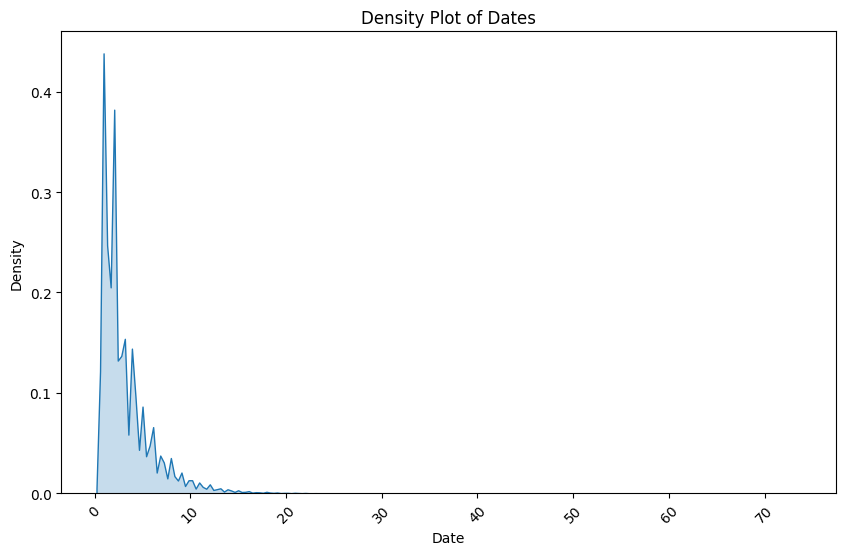

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(wcb['IME-4 Count'], fill=True)
plt.title('Density Plot of Dates')
plt.xlabel('Date')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()

In [ ]:
wcb[categorical].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Alternative Dispute Resolution,574025,2,False,571411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,574025,2046,STATE INSURANCE FUND,111144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Type,574025,6,PRIVATE,285367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claim Injury Type,574025,8,NON-COMP,291078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County of Injury,574025,63,SUFFOLK,60430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COVID-19 Indicator,574025,2,False,546504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District Name,574025,8,NYC,270778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,574025,3,M,335217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry Code,564068.0,NaN,NaN,NaN,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
Medical Fee Region,574025.0,5.0,4.0,265981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
wcb['Alternative Dispute Resolution'].value_counts(normalize=True)

Alternative Dispute Resolution
False    0.995446
True     0.004554
Name: proportion, dtype: float64

In [ ]:
wcb['COVID-19 Indicator'].value_counts(normalize=True)

COVID-19 Indicator
False    0.952056
True     0.047944
Name: proportion, dtype: float64

In [ ]:
wcb['Agreement Reached'].value_counts(normalize=True)

Agreement Reached
False    0.953335
True     0.046665
Name: proportion, dtype: float64

In [ ]:
wcb.Gender.value_counts(normalize="True")

Gender
M    0.583976
F    0.407737
U    0.008287
Name: proportion, dtype: float64

np.float64(-0.014964162259139444)